In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from warnings import filterwarnings

import warnings
warnings.filterwarnings("ignore")
filterwarnings("ignore")

In [2]:
from warnings import simplefilter
simplefilter(action="ignore", category=FutureWarning)

# Semester 1 part

# Data pre-processing, organizing and cleaning

In [3]:
data = pd.read_csv("Car prices.csv", sep = "|")
data

,semel_yevuan,shem_yevuan,sug_degem,tozeret_cd,tozeret_nm,degem_cd,degem_nm,shnat_yitzur,mehir,kinuy_mishari
0,110,"צ'מפיון מוטורס בע""מ",M,724,פולקסווגן גרמנ,612,2EE1H5,2016,288000,CRAFTER
1,110,"צ'מפיון מוטורס בע""מ",M,724,פולקסווגן גרמנ,635,7HC-7EB137,2016,322000,TRANSPORTER
2,110,"צ'מפיון מוטורס בע""מ",M,724,פולקסווגן גרמנ,646,7HC-SGBTF7,2016,400500,CARAVELLE
3,110,"צ'מפיון מוטורס בע""מ",M,724,פולקסווגן גרמנ,649,7HC-SGJ1F7,2017,333800,TRANSPORTER
4,110,"צ'מפיון מוטורס בע""מ",M,724,פולקסווגן גרמנ,649,7HC-SGJ1F7,2016,347300,TRANSPORTER
...,...,...,...,...,...,...,...,...,...,...
33333,767,מיכאל ביטון,P,728,"פורד ארה""ב",249,P8U,2022,250000,MUSTANG
33334,134,קבוצת עמק איילון,P,728,"פורד ארה""ב",262,P8T,2019,339500,MUSTANG
33335,134,קבוצת עמק איילון,P,728,"פורד ארה""ב",262,P8T,2020,339500,MUSTANG
33336,134,קבוצת עמק איילון,P,728,"פורד ארה""ב",262,P8T,2022,310000,MUSTANG


In [4]:
pd.set_option('float_format', '{:f}'.format)
data.describe(include = 'all')

,semel_yevuan,shem_yevuan,sug_degem,tozeret_cd,tozeret_nm,degem_cd,degem_nm,shnat_yitzur,mehir,kinuy_mishari
count,33338.000000,33338,33338,33338.000000,33338,33338.000000,33338,33338.000000,33338.000000,33338
unique,nan,384,2,nan,183,nan,3671,nan,nan,1840
top,nan,"צ'מפיון מוטורס בע""מ",P,nan,מרצדס בנץ גרמנ,nan,3E7E,nan,nan,MODEL 3
freq,nan,4985,30623,nan,4005,nan,361,nan,nan,571
mean,224.629402,NaN,NaN,589.891235,NaN,457.740986,NaN,2019.049403,355786.207181,NaN
std,180.823624,NaN,NaN,295.290148,NaN,594.228398,NaN,1.962770,290976.747442,NaN
min,102.000000,NaN,NaN,11.000000,NaN,1.000000,NaN,2016.000000,40000.000000,NaN
25%,110.000000,NaN,NaN,404.000000,NaN,78.000000,NaN,2017.000000,168900.000000,NaN
50%,130.000000,NaN,NaN,624.000000,NaN,209.000000,NaN,2019.000000,276900.000000,NaN
75%,242.000000,NaN,NaN,787.000000,NaN,605.000000,NaN,2021.000000,429000.000000,NaN


In [5]:
#Check if there are missing values in the data.
pd.isnull(data).sum()

semel_yevuan     0
shem_yevuan      0
sug_degem        0
tozeret_cd       0
tozeret_nm       0
degem_cd         0
degem_nm         0
shnat_yitzur     0
mehir            0
kinuy_mishari    0
dtype: int64

In [6]:
#Check correlation
data.corr()

,semel_yevuan,tozeret_cd,degem_cd,shnat_yitzur,mehir
semel_yevuan,1.000000,0.156793,0.343361,0.456815,0.158780
tozeret_cd,0.156793,1.000000,-0.126627,0.101962,0.030266
degem_cd,0.343361,-0.126627,1.000000,0.290201,0.174119
shnat_yitzur,0.456815,0.101962,0.290201,1.000000,0.110913
mehir,0.158780,0.030266,0.174119,0.110913,1.000000


In [7]:
#Unnecessary data was removed. All cd columns removed since they are simply new names for the categorical data. They are not necessary.
data.drop(columns = ['semel_yevuan', 'tozeret_cd', 'degem_cd', 'kinuy_mishari'], axis = 1, inplace = True)
data

,shem_yevuan,sug_degem,tozeret_nm,degem_nm,shnat_yitzur,mehir
0,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,2EE1H5,2016,288000
1,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-7EB137,2016,322000
2,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-SGBTF7,2016,400500
3,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-SGJ1F7,2017,333800
4,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-SGJ1F7,2016,347300
...,...,...,...,...,...,...
33333,מיכאל ביטון,P,"פורד ארה""ב",P8U,2022,250000
33334,קבוצת עמק איילון,P,"פורד ארה""ב",P8T,2019,339500
33335,קבוצת עמק איילון,P,"פורד ארה""ב",P8T,2020,339500
33336,קבוצת עמק איילון,P,"פורד ארה""ב",P8T,2022,310000


In [8]:
#Renamed colums to make data-frame more readable.
data.rename(columns = {"shem_yevuan" : "Importer_name",
                       'sug_degem' : 'Model_type',
                       'tozeret_nm' : 'Company_name',
                       'degem_nm' : 'Model_name',
                       'shnat_yitzur': 'Construction_year',
                       'mehir': 'Price'}, inplace = True)
data

,Importer_name,Model_type,Company_name,Model_name,Construction_year,Price
0,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,2EE1H5,2016,288000
1,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-7EB137,2016,322000
2,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-SGBTF7,2016,400500
3,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-SGJ1F7,2017,333800
4,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-SGJ1F7,2016,347300
...,...,...,...,...,...,...
33333,מיכאל ביטון,P,"פורד ארה""ב",P8U,2022,250000
33334,קבוצת עמק איילון,P,"פורד ארה""ב",P8T,2019,339500
33335,קבוצת עמק איילון,P,"פורד ארה""ב",P8T,2020,339500
33336,קבוצת עמק איילון,P,"פורד ארה""ב",P8T,2022,310000


In [9]:
data.describe(include = 'all')

,Importer_name,Model_type,Company_name,Model_name,Construction_year,Price
count,33338,33338,33338,33338,33338.000000,33338.000000
unique,384,2,183,3671,nan,nan
top,"צ'מפיון מוטורס בע""מ",P,מרצדס בנץ גרמנ,3E7E,nan,nan
freq,4985,30623,4005,361,nan,nan
mean,NaN,NaN,NaN,NaN,2019.049403,355786.207181
std,NaN,NaN,NaN,NaN,1.962770,290976.747442
min,NaN,NaN,NaN,NaN,2016.000000,40000.000000
25%,NaN,NaN,NaN,NaN,2017.000000,168900.000000
50%,NaN,NaN,NaN,NaN,2019.000000,276900.000000
75%,NaN,NaN,NaN,NaN,2021.000000,429000.000000


In [10]:
from sklearn.preprocessing import LabelEncoder

#Using label_encoder on all categorical data to make categorical data numerical instead, for the model to understand.
#New columns of the encoded data were added to the beginning of the DF.
data.insert(loc=0, column='Model_name_encoded', value=LabelEncoder().fit_transform(data['Model_name']))
data.insert(loc=0, column='Company_name_encoded', value=LabelEncoder().fit_transform(data['Company_name']))
data.insert(loc=0, column='Model_type_encoded', value=LabelEncoder().fit_transform(data['Model_type']))
data.insert(loc=0, column='Importer_name_encoded', value=LabelEncoder().fit_transform(data['Importer_name']))
data

,Importer_name_encoded,Model_type_encoded,Company_name_encoded,Model_name_encoded,Importer_name,Model_type,Company_name,Model_name,Construction_year,Price
0,320,0,133,454,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,2EE1H5,2016,288000
1,320,0,133,994,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-7EB137,2016,322000
2,320,0,133,1003,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-SGBTF7,2016,400500
3,320,0,133,1010,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-SGJ1F7,2017,333800
4,320,0,133,1010,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-SGJ1F7,2016,347300
...,...,...,...,...,...,...,...,...,...,...
33333,253,1,140,3074,מיכאל ביטון,P,"פורד ארה""ב",P8U,2022,250000
33334,330,1,140,3073,קבוצת עמק איילון,P,"פורד ארה""ב",P8T,2019,339500
33335,330,1,140,3073,קבוצת עמק איילון,P,"פורד ארה""ב",P8T,2020,339500
33336,330,1,140,3073,קבוצת עמק איילון,P,"פורד ארה""ב",P8T,2022,310000


In [11]:
#Copied data to new variable. From here we work with the encoded data.
data_encoded = data.copy()
data_encoded

,Importer_name_encoded,Model_type_encoded,Company_name_encoded,Model_name_encoded,Importer_name,Model_type,Company_name,Model_name,Construction_year,Price
0,320,0,133,454,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,2EE1H5,2016,288000
1,320,0,133,994,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-7EB137,2016,322000
2,320,0,133,1003,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-SGBTF7,2016,400500
3,320,0,133,1010,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-SGJ1F7,2017,333800
4,320,0,133,1010,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-SGJ1F7,2016,347300
...,...,...,...,...,...,...,...,...,...,...
33333,253,1,140,3074,מיכאל ביטון,P,"פורד ארה""ב",P8U,2022,250000
33334,330,1,140,3073,קבוצת עמק איילון,P,"פורד ארה""ב",P8T,2019,339500
33335,330,1,140,3073,קבוצת עמק איילון,P,"פורד ארה""ב",P8T,2020,339500
33336,330,1,140,3073,קבוצת עמק איילון,P,"פורד ארה""ב",P8T,2022,310000


In [12]:
#Categorical columns before encoding were removed
data_encoded.drop(columns = ['Importer_name','Model_type','Company_name','Model_name'], inplace = True)
data_encoded

,Importer_name_encoded,Model_type_encoded,Company_name_encoded,Model_name_encoded,Construction_year,Price
0,320,0,133,454,2016,288000
1,320,0,133,994,2016,322000
2,320,0,133,1003,2016,400500
3,320,0,133,1010,2017,333800
4,320,0,133,1010,2016,347300
...,...,...,...,...,...,...
33333,253,1,140,3074,2022,250000
33334,330,1,140,3073,2019,339500
33335,330,1,140,3073,2020,339500
33336,330,1,140,3073,2022,310000


In [13]:
#No data is categorical now.
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33338 entries, 0 to 33337
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Importer_name_encoded  33338 non-null  int32
 1   Model_type_encoded     33338 non-null  int32
 2   Company_name_encoded   33338 non-null  int32
 3   Model_name_encoded     33338 non-null  int32
 4   Construction_year      33338 non-null  int64
 5   Price                  33338 non-null  int64
dtypes: int32(4), int64(2)
memory usage: 1.0 MB


# Graphs and group-by's to further understand the data

In [14]:
fig=plt.figure()
plt.rcParams['figure.figsize'] = [21, 10]

<Figure size 432x288 with 0 Axes>

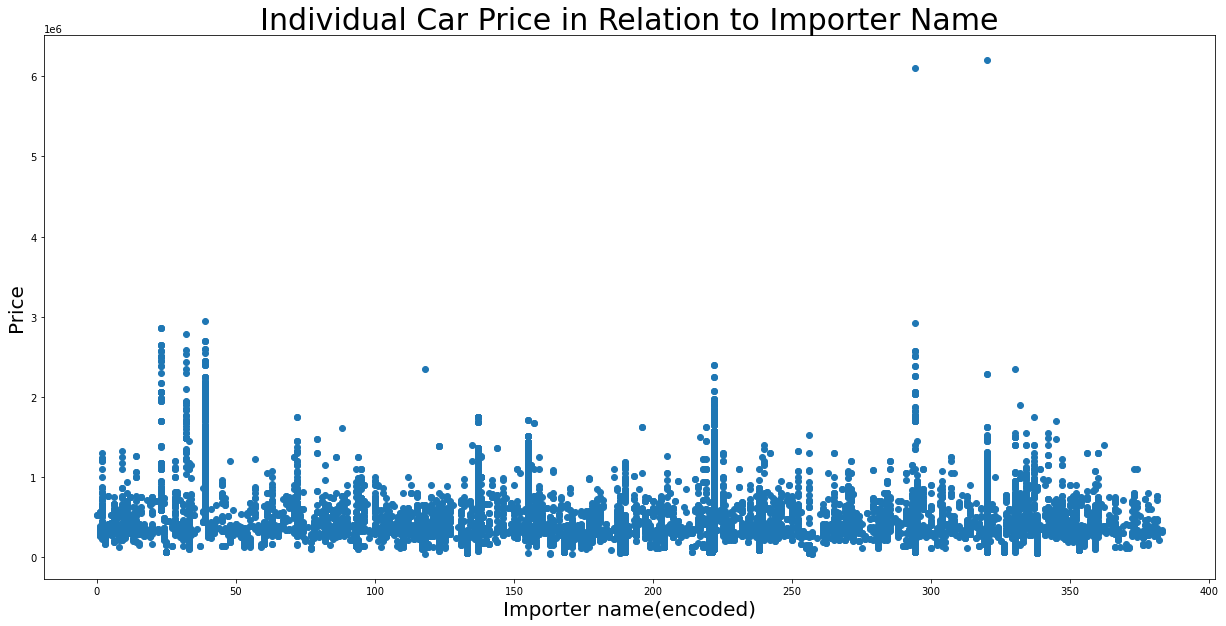

In [15]:
plt.scatter(data_encoded['Importer_name_encoded'], data_encoded['Price'])
plt.title("Individual Car Price in Relation to Importer Name", fontsize = 30)
plt.xlabel("Importer name(encoded)", fontsize = 20)
plt.ylabel("Price", fontsize = 20)
plt.show()

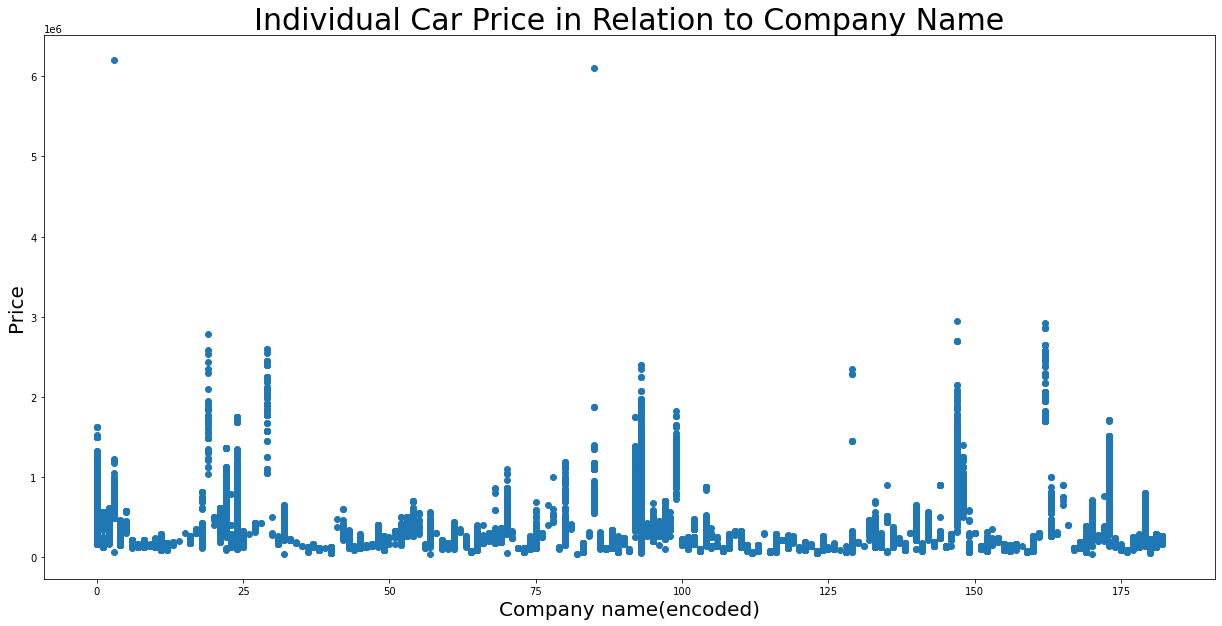

In [16]:
plt.scatter(data_encoded['Company_name_encoded'], data_encoded['Price'])
plt.title("Individual Car Price in Relation to Company Name", fontsize = 30)
plt.xlabel("Company name(encoded)", fontsize = 20)
plt.ylabel("Price", fontsize = 20)
plt.show()

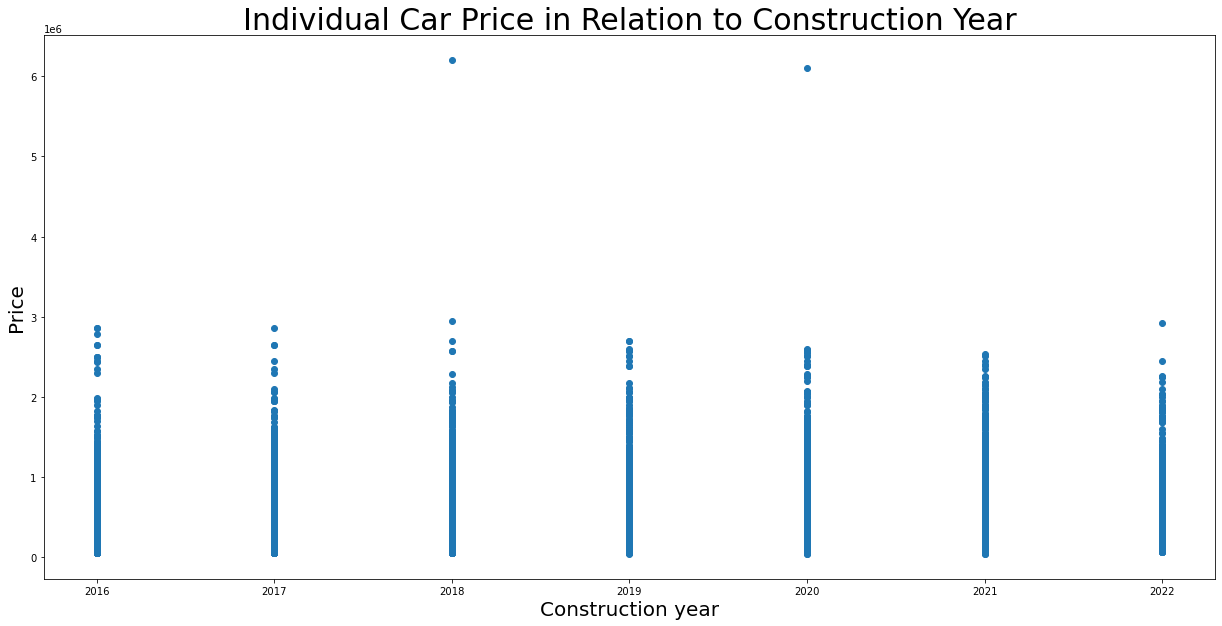

In [17]:
plt.scatter(data_encoded['Construction_year'], data_encoded['Price'])
plt.title("Individual Car Price in Relation to Construction Year", fontsize = 30)
plt.xlabel("Construction year", fontsize = 20)
plt.ylabel("Price", fontsize = 20)
plt.show()

In [18]:
group_db_1 = data_encoded.groupby(['Company_name_encoded', 'Construction_year'], as_index = False).sum()
group_db_1

,Company_name_encoded,Construction_year,Importer_name_encoded,Model_type_encoded,Model_name_encoded,Price
0,0,2016,57600,179,209952,73515600
1,0,2017,83520,261,335335,111478255
2,0,2018,38720,121,165886,47357627
3,0,2019,31252,98,128199,38106300
4,0,2020,28122,88,113475,34715500
...,...,...,...,...,...,...
917,182,2016,6016,32,31250,6784800
918,182,2017,2632,14,8769,3172600
919,182,2018,2444,13,4623,3038510
920,182,2019,564,3,147,749970


In [19]:
group_db_2 = data_encoded.groupby(['Construction_year'], as_index = False).sum()
group_db_2

,Construction_year,Importer_name_encoded,Model_type_encoded,Company_name_encoded,Model_name_encoded,Price
0,2016,1053708,4169,440036,7913459,1386490223
1,2017,1115730,4256,435022,7938302,1531378649
2,2018,953633,3875,400797,7881818,1463060218
3,2019,922470,3889,386242,8288481,1518705797
4,2020,1006350,4484,457452,9599536,1870865917
5,2021,1414477,6771,646472,12096646,2759982178
6,2022,674715,3179,289562,5667487,1330717593


Text(0, 0.5, 'Price')

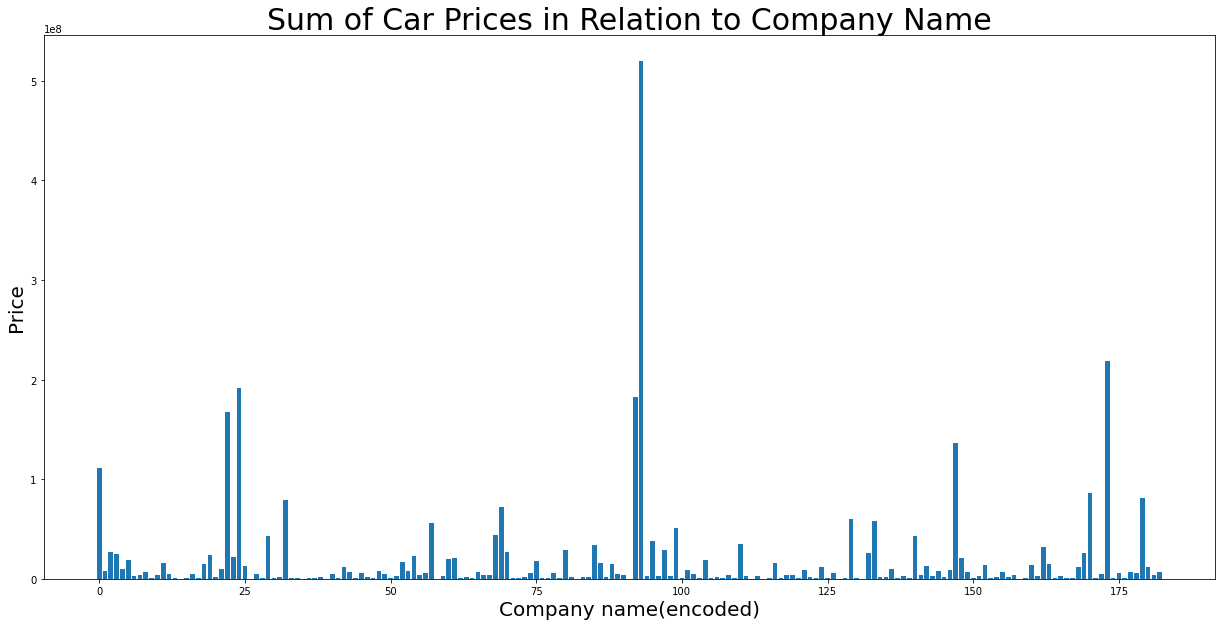

In [20]:
plt.bar(group_db_1['Company_name_encoded'], group_db_1['Price'])
plt.title("Sum of Car Prices in Relation to Company Name", fontsize = 30)
plt.xlabel("Company name(encoded)", fontsize = 20)
plt.ylabel("Price", fontsize = 20)

Text(0, 0.5, 'Price')

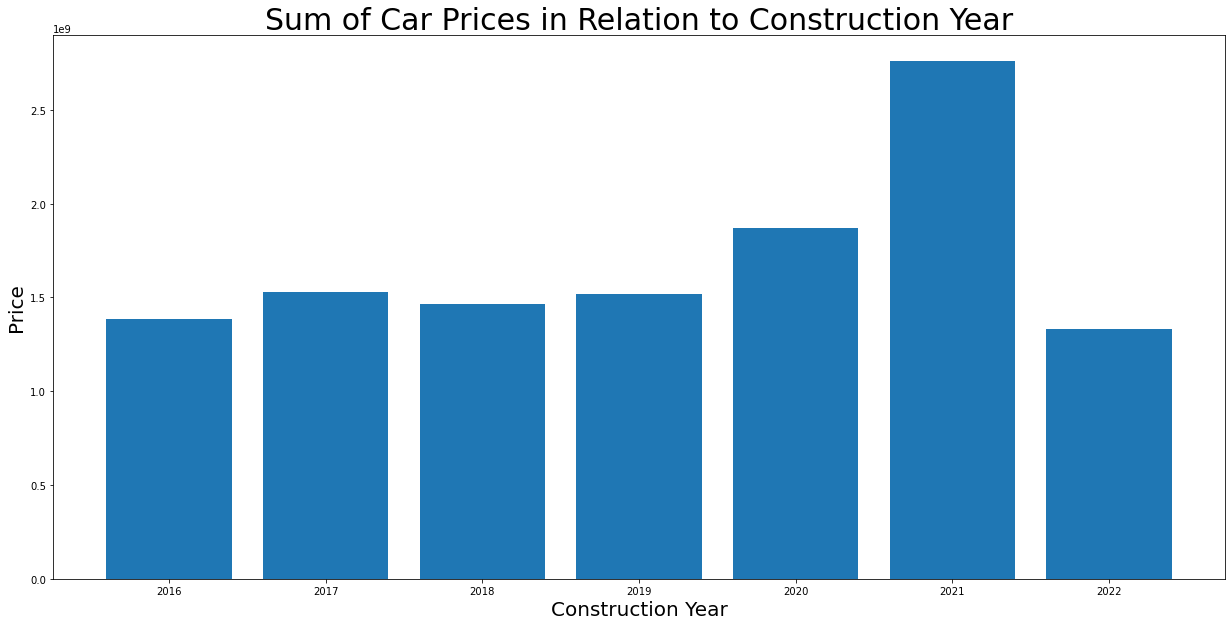

In [21]:
plt.bar(group_db_2['Construction_year'], group_db_2['Price'])
plt.title("Sum of Car Prices in Relation to Construction Year", fontsize = 30)
plt.xlabel("Construction Year", fontsize = 20)
plt.ylabel("Price", fontsize = 20)

In [22]:
#Decided to remove 2022 data since it's new and fresh and not fully collected as of this time.
data_encoded_without_2022 = data_encoded[data_encoded.Construction_year != 2022]
data_encoded_without_2022

,Importer_name_encoded,Model_type_encoded,Company_name_encoded,Model_name_encoded,Construction_year,Price
0,320,0,133,454,2016,288000
1,320,0,133,994,2016,322000
2,320,0,133,1003,2016,400500
3,320,0,133,1010,2017,333800
4,320,0,133,1010,2016,347300
...,...,...,...,...,...,...
33331,227,1,140,3073,2021,220000
33332,253,1,140,3074,2021,250000
33334,330,1,140,3073,2019,339500
33335,330,1,140,3073,2020,339500


In [23]:
data_encoded_without_2022.describe(include = 'all')

,Importer_name_encoded,Model_type_encoded,Company_name_encoded,Model_name_encoded,Construction_year,Price
count,29996.000000,29996.000000,29996.000000,29996.000000,29996.000000,29996.000000
mean,215.574343,0.914922,92.212995,1790.846846,2018.720663,351062.907788
std,90.035328,0.279002,53.330393,1122.501444,1.789865,291543.913457
min,0.000000,0.000000,0.000000,0.000000,2016.000000,40000.000000
25%,137.000000,1.000000,52.000000,720.000000,2017.000000,164990.000000
50%,220.000000,1.000000,93.000000,1806.000000,2019.000000,269500.000000
75%,320.000000,1.000000,133.000000,2722.000000,2020.000000,420600.000000
max,381.000000,1.000000,182.000000,3670.000000,2021.000000,6202001.000000


In [24]:
from sklearn.preprocessing import StandardScaler

#Scaling the data
data_encoded_without_2022_scaled = StandardScaler().fit_transform(data_encoded_without_2022.to_numpy())
data_encoded_without_2022_scaled = pd.DataFrame(data_encoded_without_2022_scaled, columns = data_encoded_without_2022.columns)
data_encoded_without_2022_scaled.head()

,Importer_name_encoded,Model_type_encoded,Company_name_encoded,Model_name_encoded,Construction_year,Price
0,1.159849,-3.279317,0.764811,-1.190973,-1.520064,-0.216310
1,1.159849,-3.279317,0.764811,-0.709897,-1.520064,-0.099688
2,1.159849,-3.279317,0.764811,-0.701879,-1.520064,0.169573
3,1.159849,-3.279317,0.764811,-0.695643,-0.961353,-0.059213
4,1.159849,-3.279317,0.764811,-0.695643,-1.520064,-0.012907


# Selecting a proper model for the data

In [25]:
from sklearn.model_selection import *
from sklearn.feature_selection import *
import random

X = data_encoded_without_2022_scaled[['Importer_name_encoded','Model_type_encoded','Company_name_encoded','Model_name_encoded', 'Construction_year']]
y = data_encoded_without_2022_scaled['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=random.randrange(1, 101))


In [26]:
#Training function. Includes regular training and cross-validation.
def train_and_evaluate(clf, X_train, y_train):
    rand = random.randrange(1, 101)
    clf.fit(X_train, y_train)
    scores_list = []
    print ("Coefficient of determination on training set:",clf.score(X_train, y_train))
    
    # create a k-fold cross validation iterator of k=10 folds
    cv = KFold(10 ,shuffle=True, random_state=rand)
    scores = cross_val_score(clf, X_train, y_train, cv=cv)
    scores_test = cross_val_score(clf, X_test, y_test, cv=cv)
    print("List of different scores: ",scores)
    print ("Average coefficient of determination using 10-fold crossvalidation:",np.mean(scores))
    print ("Average coefficient of determination using 10-fold crossvalidation(test):",np.mean(scores_test))
    scores_list.append(np.mean(scores))
    scores_list.append(np.mean(scores_test))
    return scores_list

# Linear regression attempt

In [27]:
from sklearn import linear_model

clf_sgd = linear_model.SGDRegressor(loss='squared_loss', penalty='l1',  random_state=random.randrange(1, 101))
train_and_evaluate(clf_sgd,X_train,y_train)

print("Linear regression coefficients:",clf_sgd.coef_)

Coefficient of determination on training set: 0.09232748896873655
List of different scores:  [0.10118068 0.10201498 0.08313701 0.10820833 0.08617425 0.10897837
 0.08753914 0.09943471 0.09915058 0.06469751]
Average coefficient of determination using 10-fold crossvalidation: 0.09405155575810209
Average coefficient of determination using 10-fold crossvalidation(test): 0.09014088077389006
Linear regression coefficients: [-0.20229517  0.04523873 -0.03879995 -0.17058662  0.09077341]


In [28]:
#Ridge regression. No noticable change.
clf_ridge = linear_model.Ridge()
train_and_evaluate(clf_ridge,X_train,y_train)

Coefficient of determination on training set: 0.09478838394748978
List of different scores:  [0.11582468 0.10203706 0.07902461 0.07356325 0.10163419 0.10163584
 0.09417028 0.07106688 0.09794991 0.10537791]
Average coefficient of determination using 10-fold crossvalidation: 0.09422846038995056
Average coefficient of determination using 10-fold crossvalidation(test): 0.09322131383759859


[0.09422846038995056, 0.09322131383759859]

# Random forest regression.

In [29]:
# # Random forest regressor works here, Linear regression doesn't evaluate the data well.
# from sklearn import ensemble
# rand = random.randrange(1, 101)
# cross_validation_average_scores = {}
# cross_validation_average_scores_test = {}
# for i in range(1,200, 24):
#     print("Number of estimators:",i)
#     clf_et=ensemble.ExtraTreesRegressor(n_estimators=i,random_state=rand)
#     train_scores = train_and_evaluate(clf_et,X_train,y_train)
#     cross_validation_average_scores[i] = train_scores[0]
#     cross_validation_average_scores_test[i] = train_scores[1]

#     print("")
    
# train_max = max(cross_validation_average_scores, key=cross_validation_average_scores.get)
# test_max = max(cross_validation_average_scores_test, key=cross_validation_average_scores_test.get)
# print("The biggest average train cross-validation score: " + str(cross_validation_average_scores[train_max]) + " (" +str(train_max) + ")")
# print("The biggest average test cross-validation score: " + str(cross_validation_average_scores_test[test_max]) + " (" +str(test_max) + ")")

In [30]:
# plt.bar(range(1,200, 24), cross_validation_average_scores, color = 'red')
# plt.title("Average coefficient of determination using 10-fold crossvalidation", fontsize = 20)
# plt.xlabel("Number of estimators", fontsize = 15)
# plt.ylabel("Average coefficient of determination using 10-fold crossvalidation", fontsize = 15)

In [31]:
# plt.bar(range(1,200, 24), cross_validation_average_scores_test, color = 'red')
# plt.title("Average coefficient of determination using 10-fold crossvalidation", fontsize = 20)
# plt.xlabel("Number of estimators", fontsize = 15)
# plt.ylabel("Average coefficient of determination using 10-fold crossvalidation", fontsize = 15)

In [32]:
# from sklearn import metrics
# #Perfornamce fucntion. Uses test samples.
# def measure_performance(X,y,clf,show_r2_score=False, show_mse_score=False):
#     y_pred=clf.predict(X)   
    
#     if show_r2_score:
#         print ("Coefficient of determination(R2):{0:.3f}".format(metrics.r2_score(y,y_pred)))
    
#     if show_mse_score:
#         print("Coefficient of determination(MSE):" + str(metrics.mean_squared_error(y, y_pred)))
        
# measure_performance(X_test,y_test,clf_et, show_r2_score=True, show_mse_score=True)

# Semester 2 part

In [33]:
plt.style.use("seaborn")
#Get previous data after encoder from previous part and drop encoded columns
data

,Importer_name_encoded,Model_type_encoded,Company_name_encoded,Model_name_encoded,Importer_name,Model_type,Company_name,Model_name,Construction_year,Price
0,320,0,133,454,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,2EE1H5,2016,288000
1,320,0,133,994,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-7EB137,2016,322000
2,320,0,133,1003,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-SGBTF7,2016,400500
3,320,0,133,1010,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-SGJ1F7,2017,333800
4,320,0,133,1010,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-SGJ1F7,2016,347300
...,...,...,...,...,...,...,...,...,...,...
33333,253,1,140,3074,מיכאל ביטון,P,"פורד ארה""ב",P8U,2022,250000
33334,330,1,140,3073,קבוצת עמק איילון,P,"פורד ארה""ב",P8T,2019,339500
33335,330,1,140,3073,קבוצת עמק איילון,P,"פורד ארה""ב",P8T,2020,339500
33336,330,1,140,3073,קבוצת עמק איילון,P,"פורד ארה""ב",P8T,2022,310000


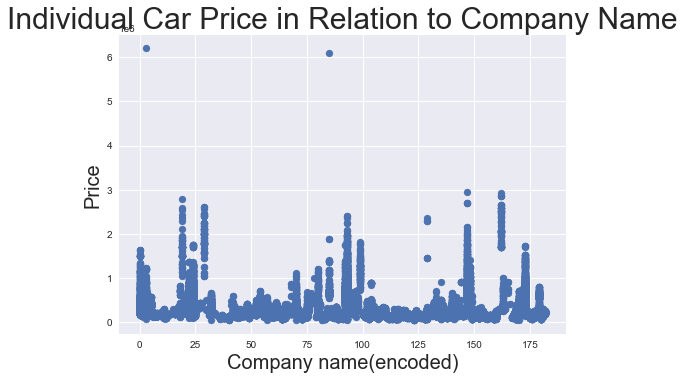

In [34]:
plt.scatter(data_encoded['Company_name_encoded'], data_encoded['Price'])
plt.title("Individual Car Price in Relation to Company Name", fontsize = 30)
plt.xlabel("Company name(encoded)", fontsize = 20)
plt.ylabel("Price", fontsize = 20)
plt.show()

In [35]:
data_encoded = data_encoded[data_encoded["Price"]<3000000]

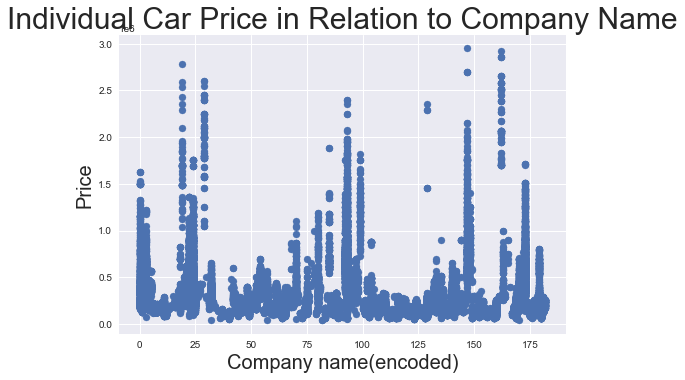

In [36]:
plt.scatter(data_encoded['Company_name_encoded'], data_encoded['Price'])
plt.title("Individual Car Price in Relation to Company Name", fontsize = 30)
plt.xlabel("Company name(encoded)", fontsize = 20)
plt.ylabel("Price", fontsize = 20)
plt.show()

In [37]:
data_encoded

,Importer_name_encoded,Model_type_encoded,Company_name_encoded,Model_name_encoded,Construction_year,Price
0,320,0,133,454,2016,288000
1,320,0,133,994,2016,322000
2,320,0,133,1003,2016,400500
3,320,0,133,1010,2017,333800
4,320,0,133,1010,2016,347300
...,...,...,...,...,...,...
33333,253,1,140,3074,2022,250000
33334,330,1,140,3073,2019,339500
33335,330,1,140,3073,2020,339500
33336,330,1,140,3073,2022,310000


In [38]:
data_non_encoded = data.drop(columns = ['Importer_name_encoded','Model_type_encoded','Company_name_encoded','Model_name_encoded'])
data_non_encoded

,Importer_name,Model_type,Company_name,Model_name,Construction_year,Price
0,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,2EE1H5,2016,288000
1,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-7EB137,2016,322000
2,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-SGBTF7,2016,400500
3,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-SGJ1F7,2017,333800
4,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-SGJ1F7,2016,347300
...,...,...,...,...,...,...
33333,מיכאל ביטון,P,"פורד ארה""ב",P8U,2022,250000
33334,קבוצת עמק איילון,P,"פורד ארה""ב",P8T,2019,339500
33335,קבוצת עמק איילון,P,"פורד ארה""ב",P8T,2020,339500
33336,קבוצת עמק איילון,P,"פורד ארה""ב",P8T,2022,310000


In [39]:
#Remove the 2022 cars since it isn't representative of that year
data_non_encoded = data_non_encoded[data_non_encoded.Construction_year != 2022]
data_encoded = data_encoded[data_encoded.Construction_year != 2022]

In [40]:
data_non_encoded

,Importer_name,Model_type,Company_name,Model_name,Construction_year,Price
0,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,2EE1H5,2016,288000
1,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-7EB137,2016,322000
2,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-SGBTF7,2016,400500
3,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-SGJ1F7,2017,333800
4,"צ'מפיון מוטורס בע""מ",M,פולקסווגן גרמנ,7HC-SGJ1F7,2016,347300
...,...,...,...,...,...,...
33331,"לוי'ס קארס בע""מ",P,"פורד ארה""ב",P8T,2021,220000
33332,מיכאל ביטון,P,"פורד ארה""ב",P8U,2021,250000
33334,קבוצת עמק איילון,P,"פורד ארה""ב",P8T,2019,339500
33335,קבוצת עמק איילון,P,"פורד ארה""ב",P8T,2020,339500


In [41]:
data_encoded

,Importer_name_encoded,Model_type_encoded,Company_name_encoded,Model_name_encoded,Construction_year,Price
0,320,0,133,454,2016,288000
1,320,0,133,994,2016,322000
2,320,0,133,1003,2016,400500
3,320,0,133,1010,2017,333800
4,320,0,133,1010,2016,347300
...,...,...,...,...,...,...
33331,227,1,140,3073,2021,220000
33332,253,1,140,3074,2021,250000
33334,330,1,140,3073,2019,339500
33335,330,1,140,3073,2020,339500


In [42]:
data_encoded.nunique()

Importer_name_encoded     369
Model_type_encoded          2
Company_name_encoded      182
Model_name_encoded       3593
Construction_year           6
Price                    3305
dtype: int64

In [43]:
data_reversed = data_non_encoded.loc[:,['Importer_name', 'Company_name']].applymap(lambda x: x[::-1]) 
data_reversed

,Importer_name,Company_name
0,"מ""עב סרוטומ ןויפמ'צ",נמרג ןגווסקלופ
1,"מ""עב סרוטומ ןויפמ'צ",נמרג ןגווסקלופ
2,"מ""עב סרוטומ ןויפמ'צ",נמרג ןגווסקלופ
3,"מ""עב סרוטומ ןויפמ'צ",נמרג ןגווסקלופ
4,"מ""עב סרוטומ ןויפמ'צ",נמרג ןגווסקלופ
...,...,...
33331,"מ""עב סראק ס'יול","ב""הרא דרופ"
33332,ןוטיב לאכימ,"ב""הרא דרופ"
33334,ןולייא קמע תצובק,"ב""הרא דרופ"
33335,ןולייא קמע תצובק,"ב""הרא דרופ"


In [44]:
data_reversed = pd.concat([data_reversed, data_non_encoded.loc[:,['Model_type','Model_name','Construction_year','Price']]], axis = 1)

In [45]:
"""
Data reversed will be used for plotting visually effective graphs.  
"""
data_reversed = data_reversed[['Importer_name','Model_type','Company_name','Model_name','Construction_year','Price']]
data_reversed

,Importer_name,Model_type,Company_name,Model_name,Construction_year,Price
0,"מ""עב סרוטומ ןויפמ'צ",M,נמרג ןגווסקלופ,2EE1H5,2016,288000
1,"מ""עב סרוטומ ןויפמ'צ",M,נמרג ןגווסקלופ,7HC-7EB137,2016,322000
2,"מ""עב סרוטומ ןויפמ'צ",M,נמרג ןגווסקלופ,7HC-SGBTF7,2016,400500
3,"מ""עב סרוטומ ןויפמ'צ",M,נמרג ןגווסקלופ,7HC-SGJ1F7,2017,333800
4,"מ""עב סרוטומ ןויפמ'צ",M,נמרג ןגווסקלופ,7HC-SGJ1F7,2016,347300
...,...,...,...,...,...,...
33331,"מ""עב סראק ס'יול",P,"ב""הרא דרופ",P8T,2021,220000
33332,ןוטיב לאכימ,P,"ב""הרא דרופ",P8U,2021,250000
33334,ןולייא קמע תצובק,P,"ב""הרא דרופ",P8T,2019,339500
33335,ןולייא קמע תצובק,P,"ב""הרא דרופ",P8T,2020,339500


# Group-by's and visualization to understand the data better

In [46]:
#Function zone
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['figure.facecolor'] = 'black'



"""
Plots sum of car prices(color = Green)
"""
def plot_grouped_price_sum(DataFrame, columns, n, largest = True): 
    if(largest):
        Grouped_data = DataFrame.groupby(by = columns).Price.sum().nlargest(n = n)
        msg = "First"
    else:
        Grouped_data = DataFrame.groupby(by = columns).Price.sum().nsmallest(n = n)
        msg = "Last"
     
    
    X_string = ""
    for i in range(len(columns)):
        if(i == len(columns) - 1):
            X_string = X_string + columns[i]
        else:
            X_string = X_string + columns[i] + ", "
    plt.figure(facecolor='black') 
    Grouped_data.plot(kind = "bar", figsize = (24, 8), fontsize = 16, color = "Green")
    ax = plt.axes()
    ax.set_facecolor("black")
    
    plt.ylabel("Sum of car price", fontsize = 16)
    plt.xlabel(X_string, fontsize = 16)
    plt.title(msg+" {0}".format(n), fontsize = 18)
    plt.show()

    
"""
Plots mean of car prices(color = Purple)
"""
def plot_grouped_price_mean(DataFrame, columns, n, largest = True):
    if(largest):
        Grouped_data = DataFrame.groupby(by = columns).Price.mean().nlargest(n = n)
        msg = "First"
    else:
        Grouped_data = DataFrame.groupby(by = columns).Price.mean().nsmallest(n = n)
        msg = "Last"
    
    X_string = ""
    for i in range(len(columns)):
        if(i == len(columns) - 1):
            X_string = X_string + columns[i]
        else:
            X_string = X_string + columns[i] + ", "
    plt.figure(facecolor='black') 
    Grouped_data.plot(kind = "bar", figsize = (24, 8), fontsize = 16, color = "Purple")
    ax = plt.axes()
    ax.set_facecolor("black")
    
    plt.ylabel("Car price mean", fontsize = 16)
    plt.xlabel(X_string, fontsize = 16)
    plt.title(msg+" {0}".format(n), fontsize = 18)
    plt.show()
    
"""
Plots amount of cars(color = blue)
"""
def plot_grouped_car_count(DataFrame, columns, n, largest = True):
    if(largest):
        Grouped_data = DataFrame.groupby(by = columns).Price.count().nlargest(n = n)
        msg = "First"
    else:
        Grouped_data = DataFrame.groupby(by = columns).Price.count().nsmallest(n = n)
        msg = "Last"
    
    X_string = ""
    for i in range(len(columns)):
        if(i == len(columns) - 1):
            X_string = X_string + columns[i]
        else:
            X_string = X_string + columns[i] + ", "
    plt.figure(facecolor='black') 
    Grouped_data.plot(kind = "bar", figsize = (24, 8), fontsize = 16, color = "blue")
    ax = plt.axes()
    ax.set_facecolor("black")
    
    plt.ylabel("Car count", fontsize = 16)
    plt.xlabel(X_string, fontsize = 16)
    plt.title(msg+" {0}".format(n), fontsize = 18)
    plt.show()

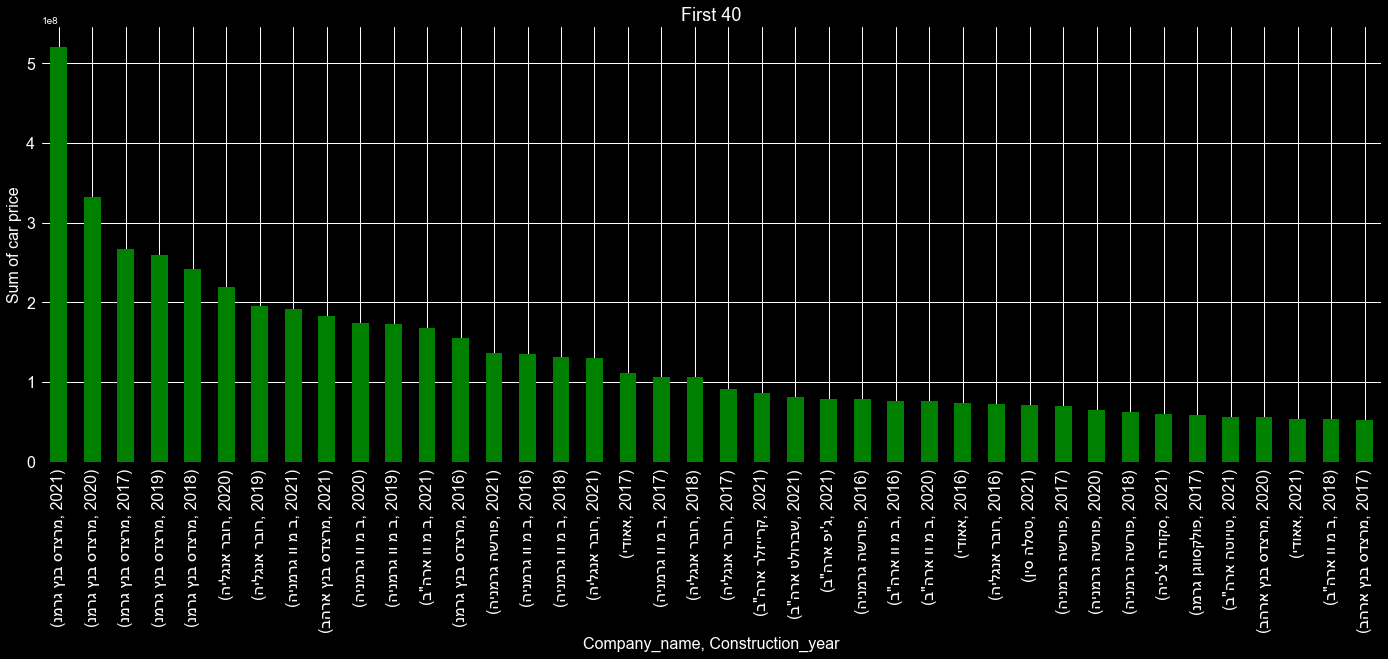

In [47]:
plot_grouped_price_sum(DataFrame = data_reversed, columns = ['Company_name','Construction_year'], n = 40)

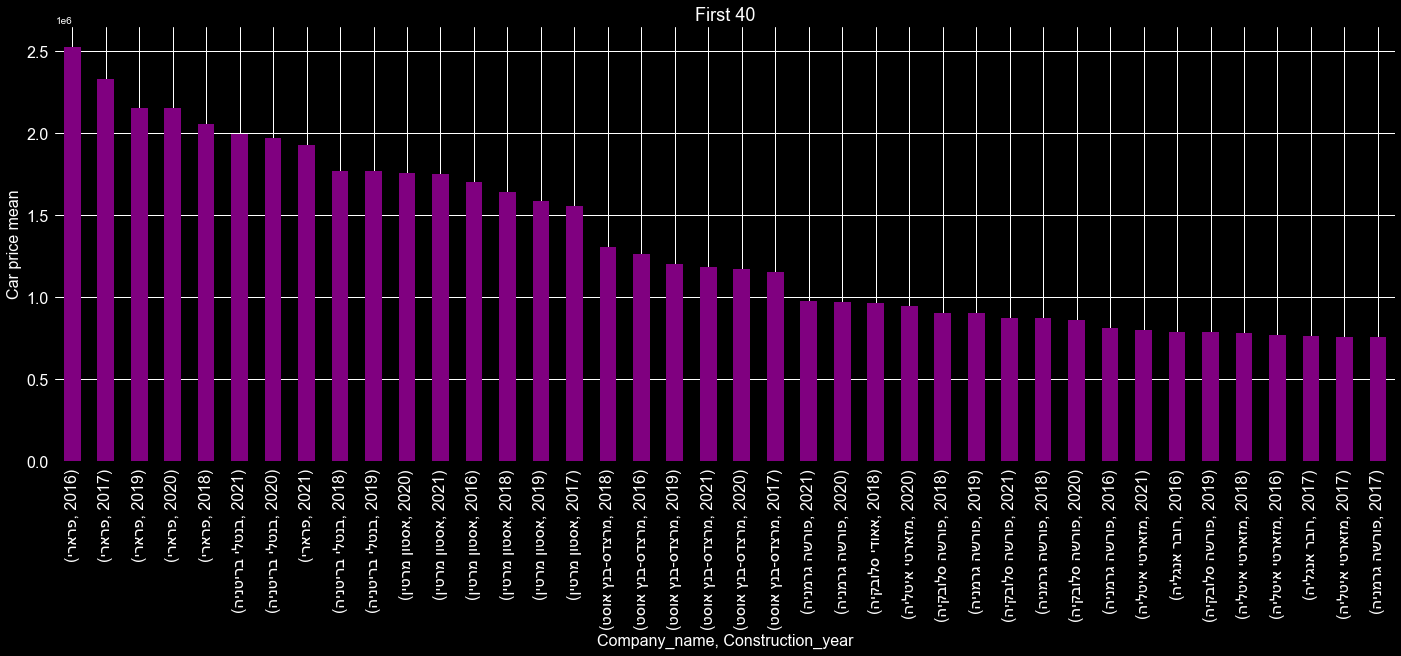

In [48]:
plot_grouped_price_mean(DataFrame = data_reversed, columns = ['Company_name','Construction_year'], n = 40)

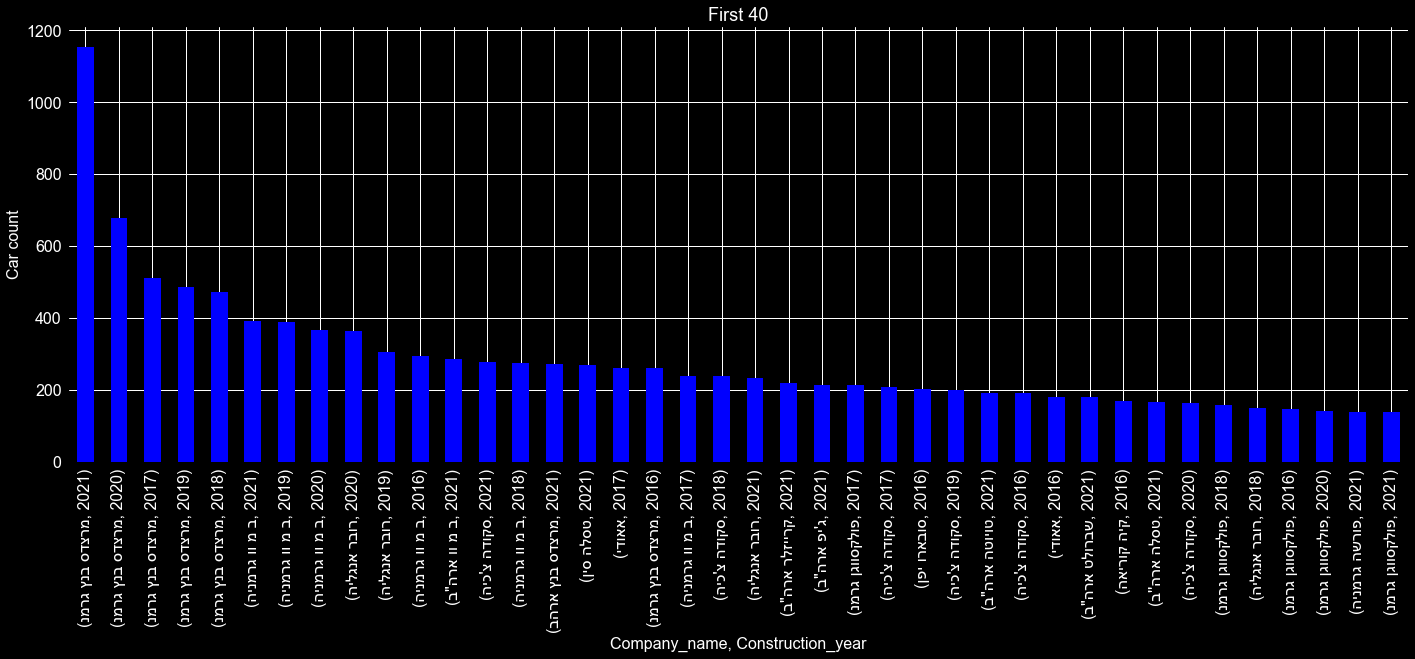

In [49]:
plot_grouped_car_count(DataFrame = data_reversed, columns = ['Company_name','Construction_year'], n = 40)

# Models

## Dummy Model

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [51]:
X = data_encoded.drop("Price", axis = 1).values
y = data_encoded['Price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [52]:
from sklearn.dummy import DummyRegressor
dum = DummyRegressor(strategy="median")
dum.fit(X_train, y_train)
dum.score(X_test, y_test)

-0.07383132176812235

## Linear Regression

In [53]:
regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

print("Score on test: {}".format(regressor.score(X_test, y_test)))
print("Training set cv score (r2): {}".format(cross_val_score(regressor, X_train, y_train, cv=10, scoring='r2').mean()))
print("Test set cv score (r2): {}".format(cross_val_score(regressor, X_test, y_test, cv=10, scoring='r2').mean()))

Score on test: 0.10408454716970916
Training set cv score (r2): 0.09544997152558164
Test set cv score (r2): 0.1002379939276079


In [54]:
def compare(predicted):
    outcomes = [(i, y_test[i], predicted[i]) for i in range(len(y_test))]
    outcomes_sorted = sorted(outcomes, key=lambda x:x[1])

    means_list = []
    for i in range(10):
        sliced = outcomes_sorted[int(len(outcomes_sorted)/10)*(i):int(len(outcomes_sorted)/10)*(i+1)]
        real_sum = sum([sliced[i][1] for i in range(len(sliced))])/len(sliced)
        predicted_sum = sum([sliced[i][2] for i in range(len(sliced))])/len(sliced)
        means_list.append((real_sum, predicted_sum))

    df = pd.DataFrame({'Real': [means_list[i][0] for i in range(10)],
                       'Predicted': [means_list[i][1] for i in range(10)]})
    df.plot(kind='bar', figsize = (24, 8), fontsize = 16)    
    plt.title("Predicted price vs Real Price (mean prices)", fontsize = 18)

    plt.show()

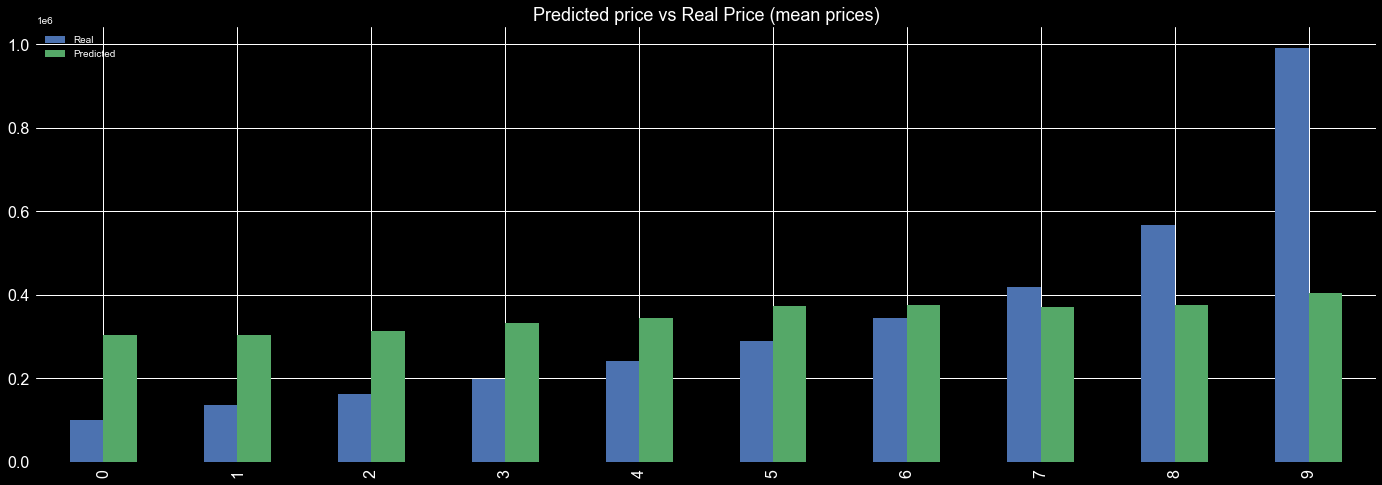

In [55]:
compare(predicted)

## XGBoost

In [56]:
from xgboost import XGBRegressor
XGB = XGBRegressor()
XGB.fit(X_train, y_train)
print("Score on test: {}".format(XGB.score(X_test, y_test)))
print("Training set cv score (r2): {}".format(cross_val_score(XGB, X_train, y_train, cv=10, scoring='r2').mean()))
print("Test set cv score (r2): {}".format(cross_val_score(XGB, X_test, y_test, cv=10, scoring='r2').mean()))

Score on test: 0.9167140107788254
Training set cv score (r2): 0.9188659772351568
Test set cv score (r2): 0.8380187994436893


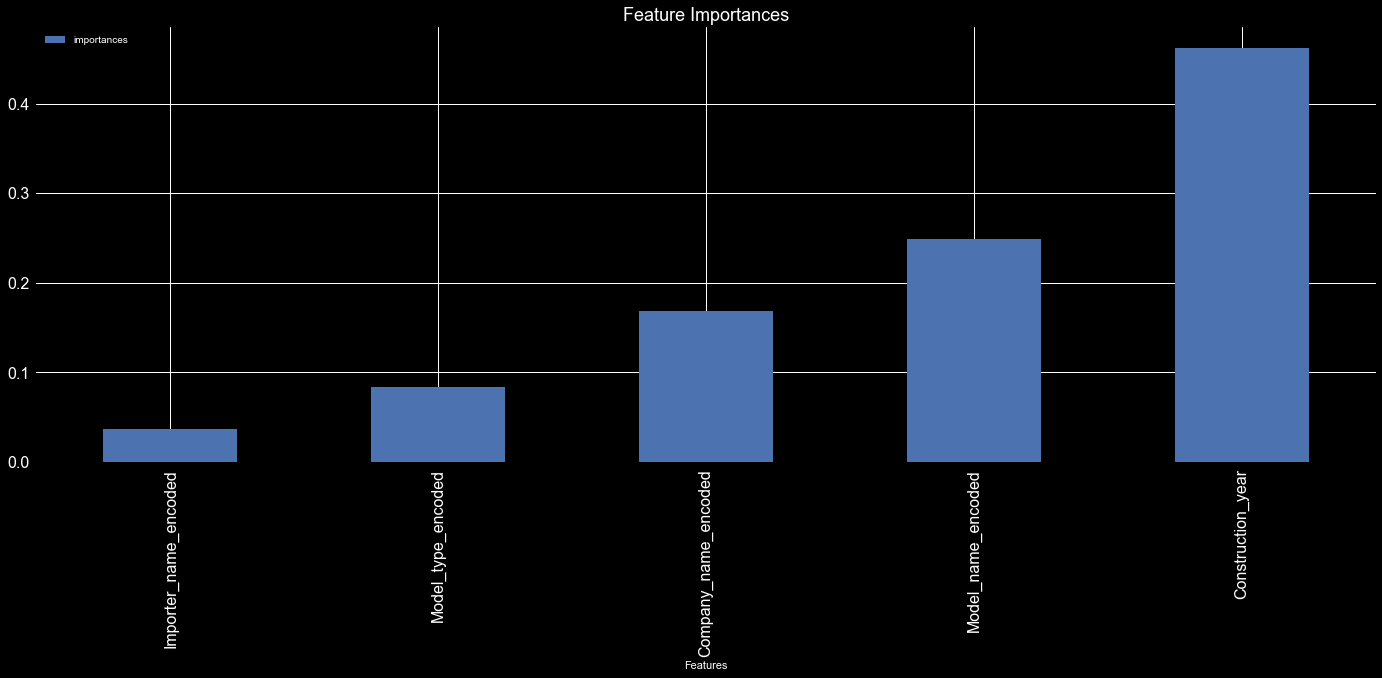

In [57]:
indexes = np.argsort(XGB.feature_importances_)
df = pd.DataFrame({"Features": data_encoded.columns[:-1], 
                  "importances" : XGB.feature_importances_[indexes]})
df = df.set_index("Features")
df.plot(kind='bar', figsize = (24, 8), fontsize = 16)    
plt.title("Feature Importances", fontsize = 18)

plt.show()

In [58]:
# param_grid = {
#     'n_estimators': [400],
#     'colsample_bytree': [0.7, 0.8],
#     'max_depth': [15,25],
#     'reg_alpha': [1.1, 1.3],
#     'reg_lambda': [1.1, 1.3],
#     'subsample': [0.7, 0.9]
# }
# grid = GridSearchCV(estimator=XGB, param_grid=param_grid, n_jobs=4, cv=5, scoring='r2', verbose = 1)
# XGB_grid = grid.fit(X_train, y_train)
# print("Best Score: {}".format(XGB_grid.best_score_))
# print("Best Parameters:" + XGB_grid.best_params_)

In [59]:
from sklearn.pipeline import Pipeline

XGB = XGBRegressor(colsample_bytree = 0.7, max_depth=15, n_estimators=400, subsample=0.9, reg_lambda=1.3, reg_alpha=1.3)
XGB_pipe = Pipeline(steps=[('Scaler', StandardScaler()), ('XGBoost', XGB)])
XGB_pipe.fit(X_train, y_train)
print("Score on test: {}".format(XGB_pipe.score(X_test, y_test)))
print("Training set cv score (r2): {}".format(cross_val_score(XGB_pipe, X_train, y_train, cv=10, scoring='r2').mean()))

Score on test: 0.9445621346473295
Training set cv score (r2): 0.9457369540923206


## Random Forest Regressor

In [60]:
from sklearn.ensemble import RandomForestRegressor
RFR_pipe = Pipeline(steps=[('Scaler', StandardScaler()), ('RandomForest', RandomForestRegressor(n_estimators = 500))])
RFR_pipe.fit(X_train, y_train)
print("Score on test: {}".format(RFR_pipe.score(X_test, y_test)))
print("Training set cv score (r2): {}".format(cross_val_score(RFR_pipe, X_train, y_train, cv=5, scoring='r2').mean()))

Score on test: 0.9361769809262503
Training set cv score (r2): 0.9353834182654068


## Voting Regressor

In [61]:
from sklearn.ensemble import VotingRegressor
voter = VotingRegressor([('XGB', XGB_pipe),('RFR', RFR_pipe)])
voter.fit(X_train, y_train)
print("Score on test: {}".format(voter.score(X_test, y_test)))
print("Training set cv score (r2): {}".format(cross_val_score(voter, X_train, y_train, cv=5, scoring='r2').mean()))

Score on test: 0.9462476610090444
Training set cv score (r2): 0.9450073446507359


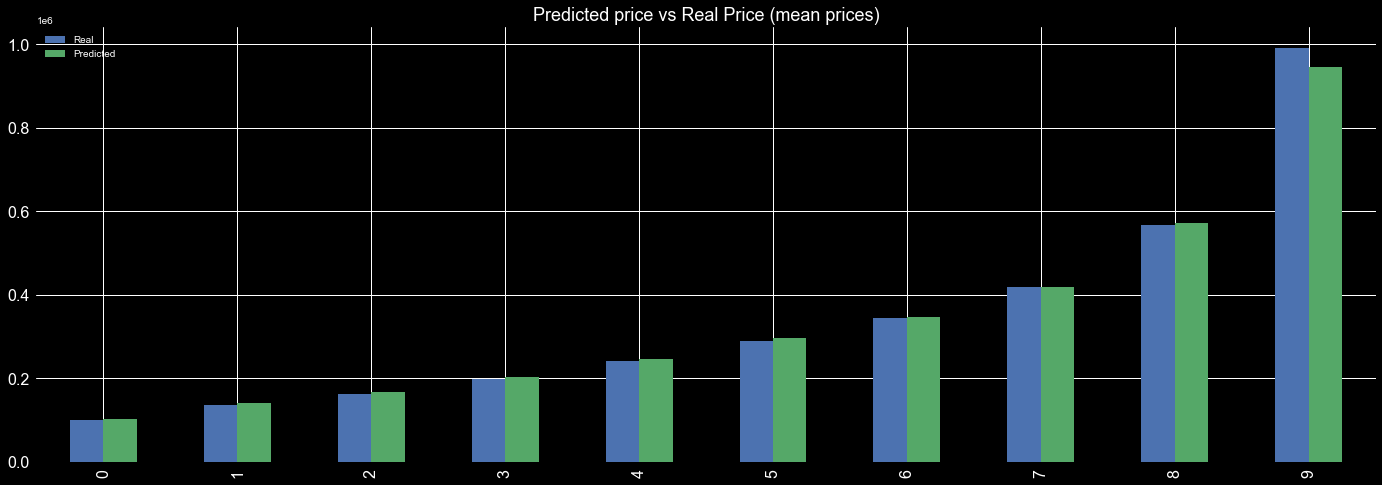

In [62]:
compare(voter.predict(X_test))